In [53]:
%reset -f
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import pandas as pd
import os

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


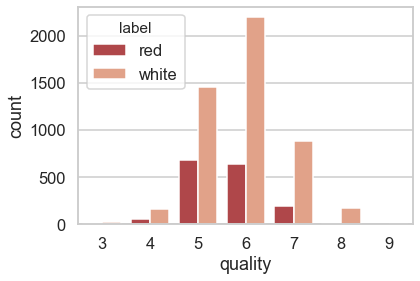

In [54]:
################ PROBLEM 1 ##################

# Reading in the data and visualizing data

# Reading in data as panda dataframes
reddata = pd.read_csv('/Users/student2/projects/INFO8000/winequality-red.csv', delimiter = ";")
whitedata = pd.read_csv('/Users/student2/projects/INFO8000/winequality-white.csv', delimiter = ";")  

# Creating new labels
reddata["label"] = "red"
whitedata["label"] = "white"

# Combining both panda dataframes
redwhite = pd.concat([reddata, whitedata])

# Visualizing data
sns.set(style="whitegrid")
sns.axes_style('white')
sns.set_context("talk")
sns.set_palette("RdBu")
g = sns.countplot(x='quality', data=redwhite, hue = "label"); 

# Looking at the first few lines
redwhite.head()

In [55]:
# Looking at the statistical details of red data
reddata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
# Looking at the statistical details of white data
whitedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
       -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
       -4.13653144e-01,  9.16334413e-01,  2.76197699e-01])

21.965208449451616

'RMSE = 0.6455750670692045'

'R-squared = 0.3605517030386882'

Text(0.5, 0.98, 'Residual Plot')

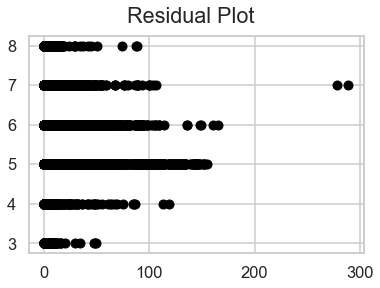

In [75]:
# Linear regression looking at quality and red

reddata = reddata.fillna(method='ffill')

X = reddata[['fixed acidity', 'volatile acidity', 'citric acid', 
             'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

y = reddata['quality'].values

lr = LinearRegression()
#reg = LinearRegression().fit(X, y)
reg = lr.fit(X,y)


display(reg.coef_)
display(reg.intercept_)

y_pred = reg.predict(X)

error = y_pred - y

sse = np.sum(error**2)
rmse = np.sqrt(sse/len(X))
mse_sklearn_way = np.sqrt(mean_squared_error(y_pred, y))
display("RMSE = " + str(rmse))
rsquare = reg.score(X, y)
display("R-squared = " + str(rsquare))

g = plt.plot(X, y, 'o', color='black')
plt.suptitle('Residual Plot') # Likely two outliers that may be pulling the data

Text(0, 0.5, 'Predicted Quality')

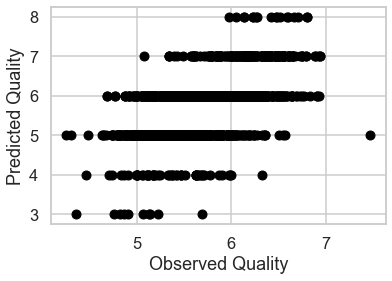

In [71]:
h = plt.plot(y_pred, y, 'o',color='black')
plt.xlabel("Observed Quality")
plt.ylabel("Predicted Quality")

array([ 6.55199614e-02, -1.86317709e+00,  2.20902007e-02,  8.14828026e-02,
       -2.47276537e-01,  3.73276519e-03, -2.85747419e-04, -1.50284181e+02,
        6.86343742e-01,  6.31476473e-01,  1.93475697e-01])

150.19284248121068

'RMSE = 0.7504359153109994'

'R-squared = 0.2818703641332847'

Text(0.5, 0.98, 'Residual Plot')

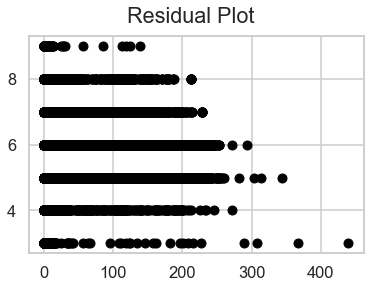

In [76]:
# Linear regression looking at quality with white data

whitedata = whitedata.fillna(method='ffill')

X = whitedata[['fixed acidity', 'volatile acidity', 'citric acid', 
             'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

y = whitedata['quality'].values

lr = LinearRegression()
#reg = LinearRegression().fit(X, y)
reg = lr.fit(X,y)


display(reg.coef_)
display(reg.intercept_)

y_pred = reg.predict(X)

error = y_pred - y

sse = np.sum(error**2)
rmse = np.sqrt(sse/len(X))
mse_sklearn_way = np.sqrt(mean_squared_error(y_pred, y))
display("RMSE = " + str(rmse))
rsquare = reg.score(X, y)
display("R-squared = " + str(rsquare))

g = plt.plot(X, y, 'o', color='black')
plt.suptitle('Residual Plot')

# The low R-squared indicates noise and high-variability. 
# Data points are not super close the regression line

Text(0, 0.5, 'Predicted Quality')

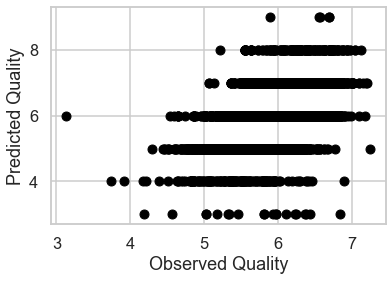

In [77]:
h = plt.plot(y_pred, y, 'o',color='black')
plt.xlabel("Observed Quality")
plt.ylabel("Predicted Quality")

array([ 6.76839156e-02, -1.32789221e+00, -1.09656648e-01,  4.35587507e-02,
       -4.83713531e-01,  5.96988830e-03, -2.48129841e-03, -5.49669422e+01,
        4.39296072e-01,  7.68251760e-01,  2.67030009e-01])

55.76274961173643

'RMSE = 0.7346532973303374'

'R-squared = 0.29213688504020474'

Text(0.5, 0.98, 'Residual Plot')

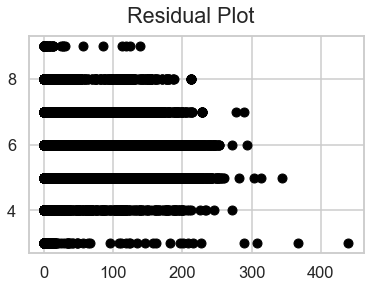

In [78]:
# Linear regression looking at quality with all data

redwhite = redwhite.fillna(method='ffill')

X = redwhite[['fixed acidity', 'volatile acidity', 'citric acid', 
             'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

y = redwhite['quality'].values

lr = LinearRegression()
#reg = LinearRegression().fit(X, y)
reg = lr.fit(X,y)


display(reg.coef_)
display(reg.intercept_)

y_pred = reg.predict(X)

error = y_pred - y

sse = np.sum(error**2)
rmse = np.sqrt(sse/len(X))
mse_sklearn_way = np.sqrt(mean_squared_error(y_pred, y))
display("RMSE = " + str(rmse))
rsquare = reg.score(X, y)
display("R-squared = " + str(rsquare))

g = plt.plot(X, y, 'o', color='black')
plt.suptitle('Residual Plot')

# The low R-squared indicates noise and high-variability. 
# Data points are not super close the regression line

Text(0, 0.5, 'Predicted Quality')

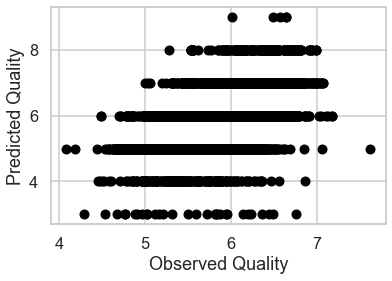

In [79]:
h = plt.plot(y_pred, y, 'o',color='black')
plt.xlabel("Observed Quality")
plt.ylabel("Predicted Quality")

In [89]:
################ PROBLEM 2 ##################

### Survival logistic regression
survivaldata = pd.read_csv('/Users/student2/projects/INFO8000/haberman.data',
                       names = ['PatientAge', 'Year', 'SumNodes', "Survivalstatus"],
                       delimiter = ",") 

num = survivaldata.Survivalstatus.value_counts() 
print(num)
inf = survivaldata.info()
print(inf)

survivaldata.describe()

# Four columns with 306 observations and no NAs

1    225
2     81
Name: Survivalstatus, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
PatientAge        306 non-null int64
Year              306 non-null int64
SumNodes          306 non-null int64
Survivalstatus    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


,PatientAge,Year,SumNodes,Survivalstatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


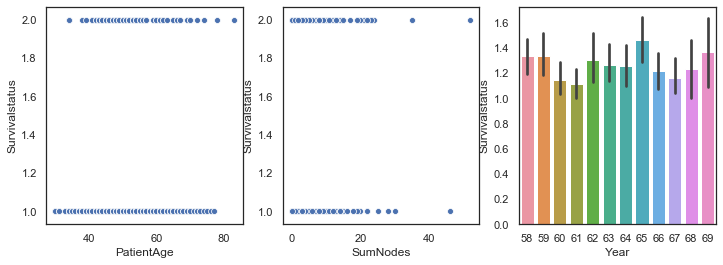

In [88]:
# Visualizing the three variables of interest

with sns.axes_style('white'):
    sns.set_context("notebook")
    figs, (g, g2, g3) = plt.subplots(ncols =3, nrows =1) #make a 2 column empty graph
    figs.set_size_inches(12, 4)

    figure1 = sns.scatterplot(x=survivaldata.PatientAge, y=survivaldata.Survivalstatus, ax = g)
    figure2 = sns.scatterplot(x=survivaldata.SumNodes, y=survivaldata.Survivalstatus, ax = g2)
    figure3 = sns.barplot(x=survivaldata.Year, y=survivaldata.Survivalstatus, ax = g3)

In [92]:
X = survivaldata[['PatientAge', 'SumNodes', 'Year']].values
y = survivaldata['Survivalstatus'].values

lg = LogisticRegression(solver = 'lbfgs')
fit = lg.fit(X,y)
display(f"{fit.coef_}, {fit.intercept_}") 

y_pred = lg.predict(X)

display(confusion_matrix(y,y_pred)) 

print(classification_report(y,y_pred))

# The precision as to which the model predicts survival is 76% for death and 58% for survival

'[[ 0.01988257  0.08838822 -0.00975411]], [-1.86233569]'

array([[215,  10],
       [ 67,  14]], dtype=int64)

              precision    recall  f1-score   support

           1       0.76      0.96      0.85       225
           2       0.58      0.17      0.27        81

    accuracy                           0.75       306
   macro avg       0.67      0.56      0.56       306
weighted avg       0.72      0.75      0.69       306



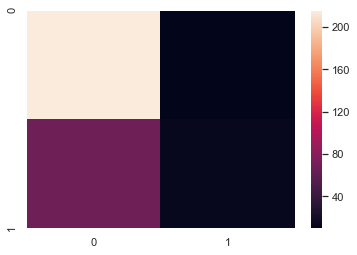

In [93]:
sns.heatmap(pd.DataFrame(confusion_matrix(y,y_pred)))
plt.show()